In [1]:
import pandas as pd
import numpy as np

<ipython-input-1-baf368f80de7>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
%pip install seaborn

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


### Data Collection

In [4]:
df = pd.read_csv('cardio_train.csv',sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
df['age'] = (df['age']/365).round()

In [6]:
df['height']=df['height'].apply(lambda x: x/100)

In [7]:
df.shape

(70000, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  float64
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  float64
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 6.9 MB


In [9]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.338686,1.349571,1.643592,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.765294,0.476838,0.082101,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,30.000000,1.000000,0.550000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,1.590000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,54.000000,1.000000,1.650000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,1.700000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,2.500000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Data Cleaning

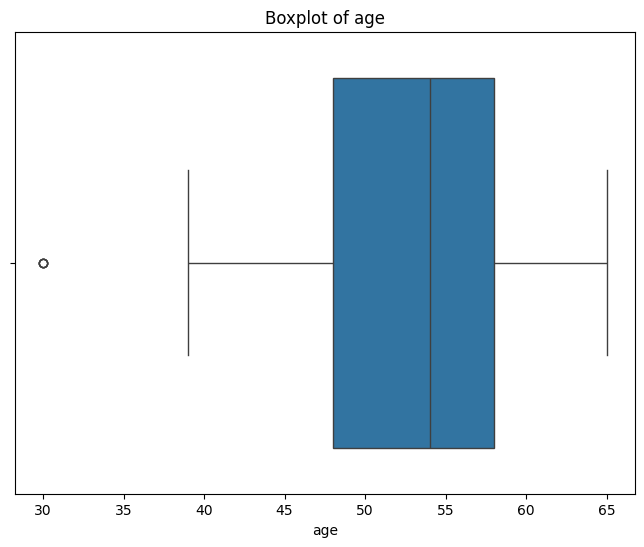

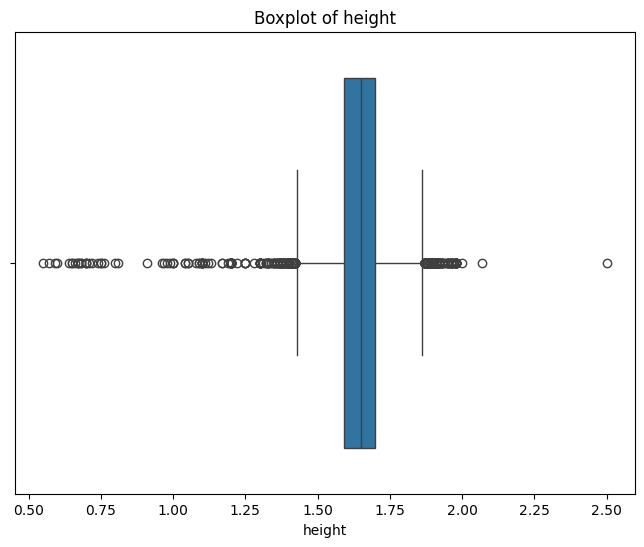

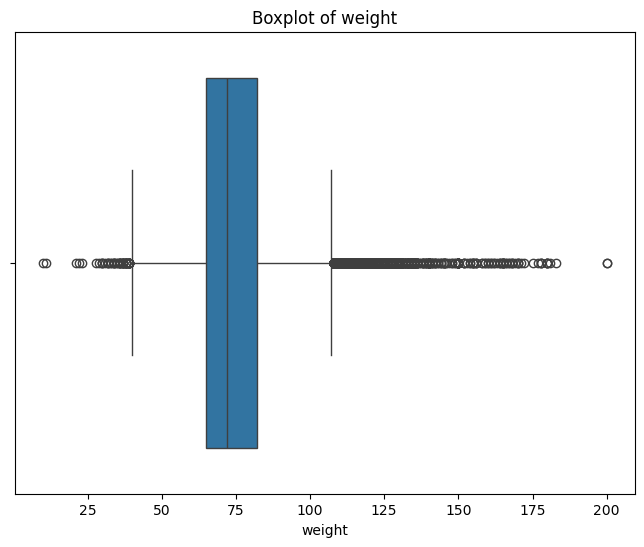

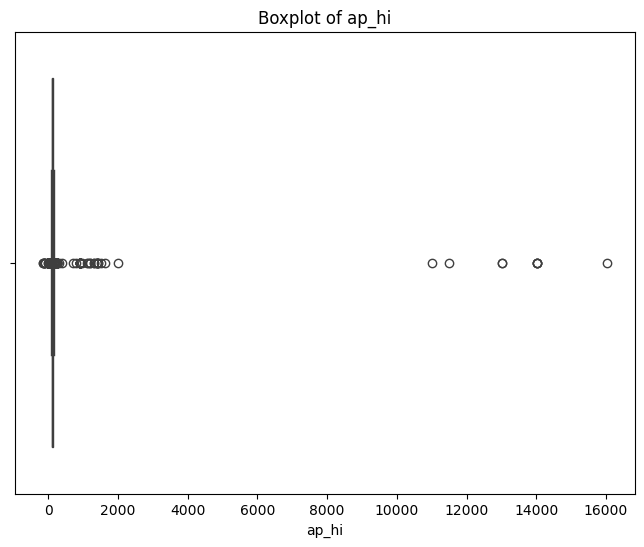

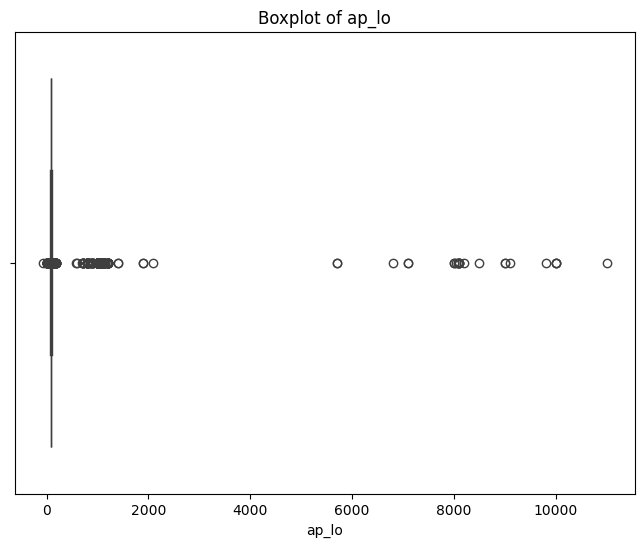

In [10]:

for col in ["age","height","weight","ap_hi","ap_lo"]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [11]:
columns_to_clean = ['ap_hi', 'ap_lo', 'weight', 'height']
for col in columns_to_clean:
    lower_bound = df[col].quantile(0.025)  # 2.5th percentile
    upper_bound = df[col].quantile(0.975)  # 97.5th percentile
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [12]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,60752.000000,60752.000000,60752.000000,60752.000000,60752.000000,60752.000000,60752.000000,60752.000000,60752.000000,60752.000000,60752.000000,60752.000000,60752.000000
mean,49887.599898,53.361453,1.347890,1.645572,73.526580,126.157065,81.153131,1.353865,1.220816,0.085726,0.052179,0.803496,0.491902
std,28840.264754,6.745200,0.476305,0.068346,11.701221,14.287093,8.314405,0.672054,0.567928,0.279961,0.222390,0.397357,0.499939
min,0.000000,30.000000,1.000000,1.500000,52.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24863.750000,48.000000,1.000000,1.600000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,49885.000000,54.000000,1.000000,1.650000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74736.250000,58.000000,2.000000,1.690000,80.850000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,1.800000,107.000000,170.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df.shape

(60752, 13)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60752 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           60752 non-null  int64  
 1   age          60752 non-null  float64
 2   gender       60752 non-null  int64  
 3   height       60752 non-null  float64
 4   weight       60752 non-null  float64
 5   ap_hi        60752 non-null  int64  
 6   ap_lo        60752 non-null  int64  
 7   cholesterol  60752 non-null  int64  
 8   gluc         60752 non-null  int64  
 9   smoke        60752 non-null  int64  
 10  alco         60752 non-null  int64  
 11  active       60752 non-null  int64  
 12  cardio       60752 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 6.5 MB


### Exploratoty Data Analysis

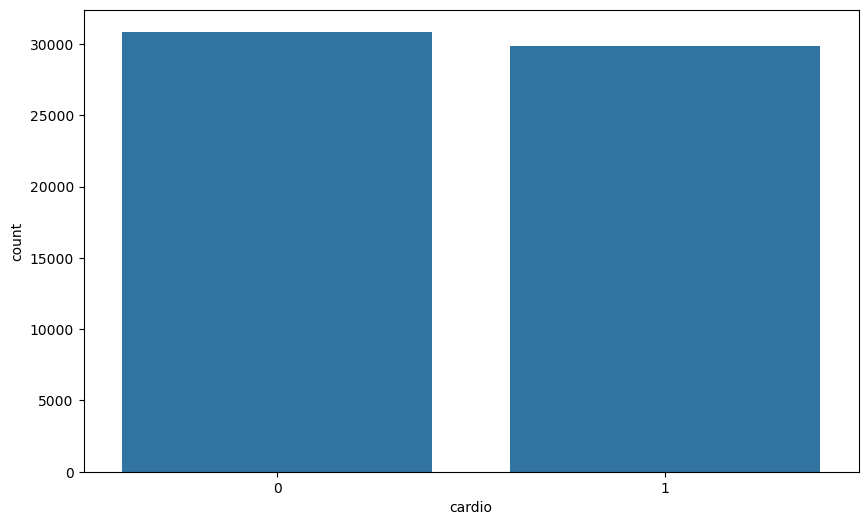

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='cardio')
plt.show()

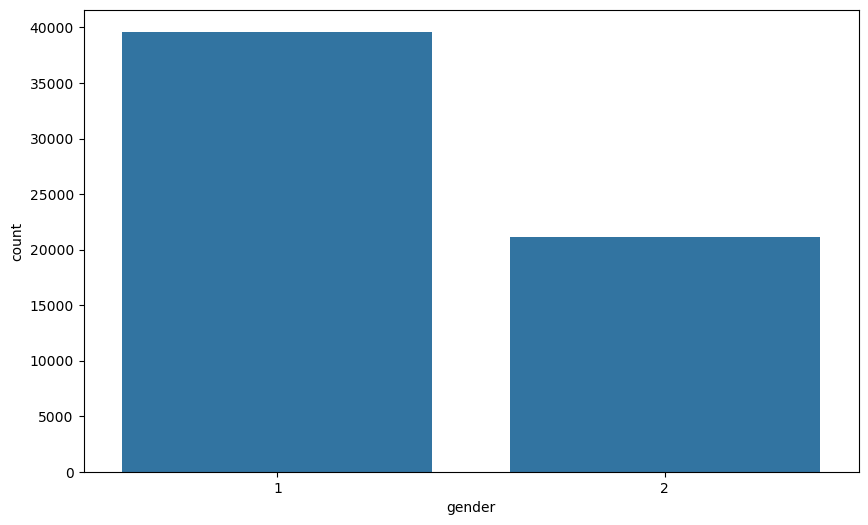

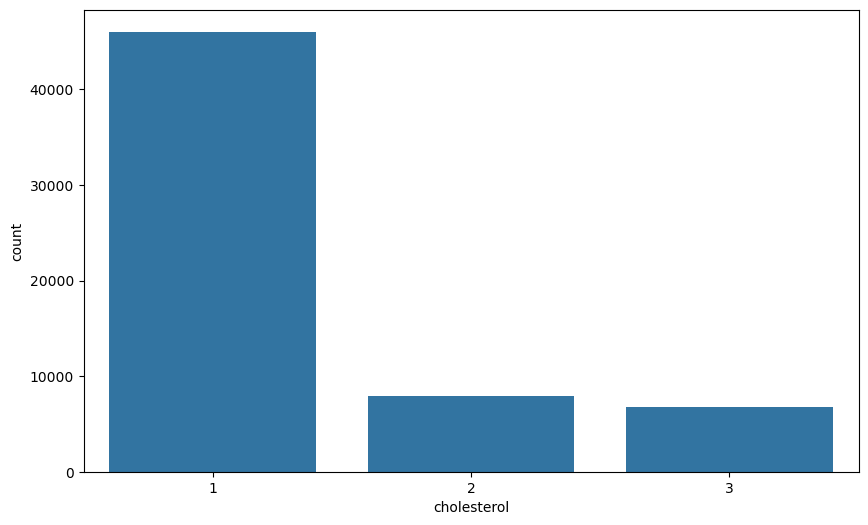

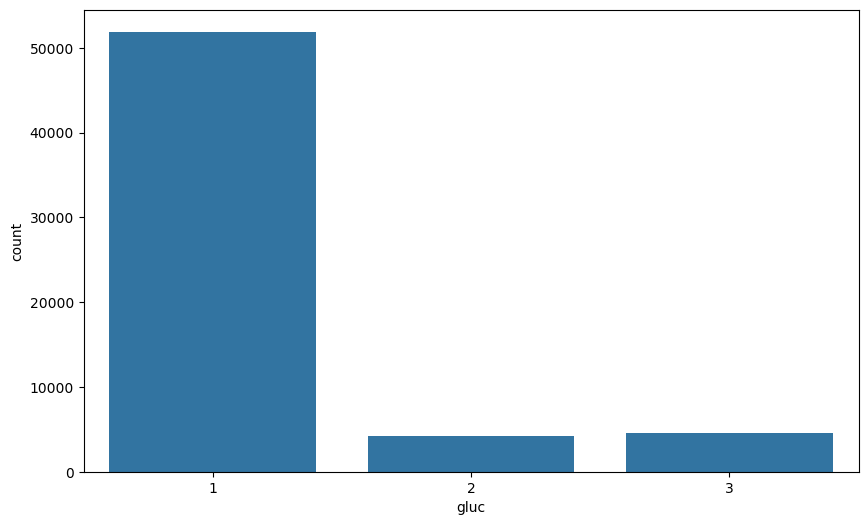

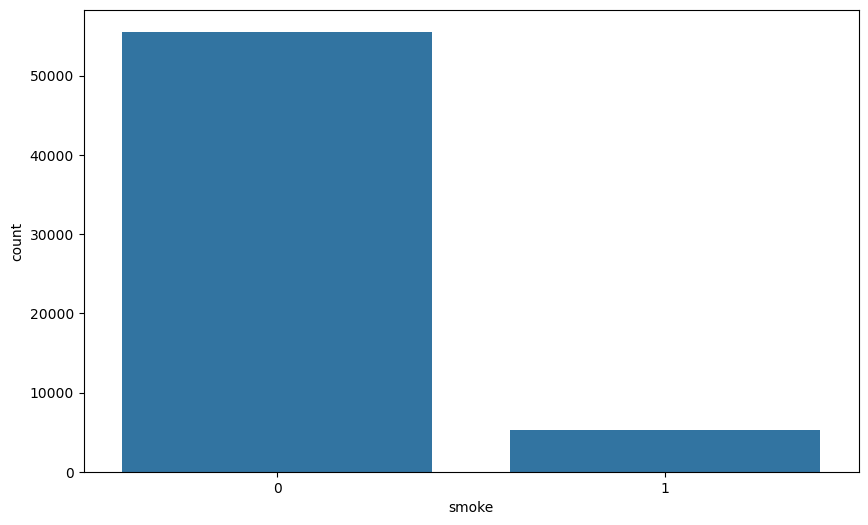

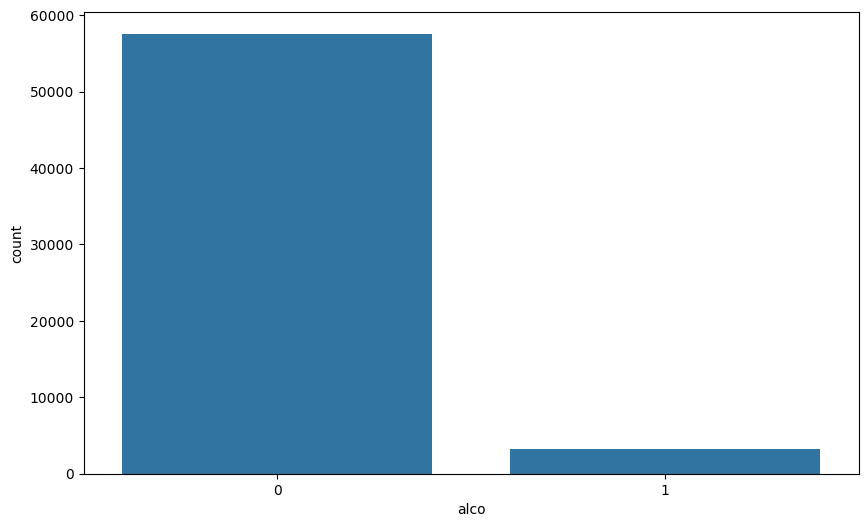

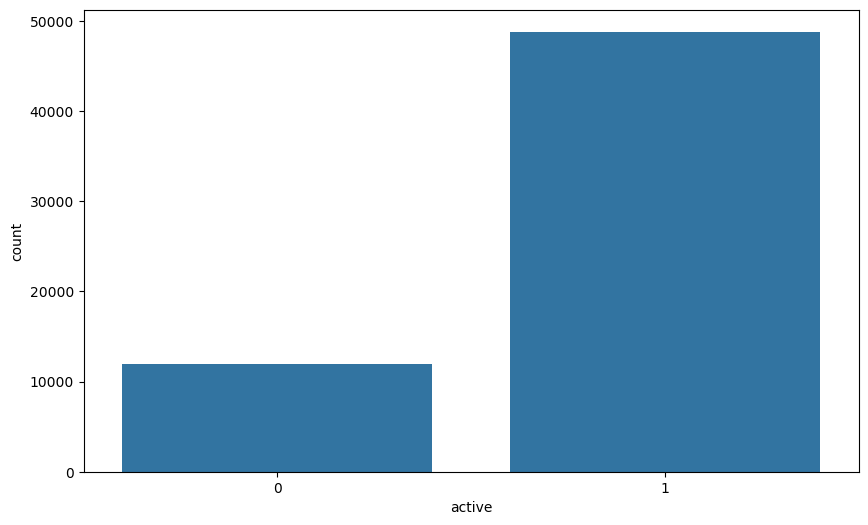

In [16]:
for i in ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x=i)
    plt.show()


In [17]:
df['bmi']=df['weight']/(df['height'])**2 #Calculating BMI using weight and height
df['map'] = (2*df['ap_lo'] + df['ap_hi'])/3 #Calculating Mean Arterial Pressure using ap_lo and ap_hi

In [18]:
data=df.copy()

In [19]:
df['cholesterol']=df['cholesterol'].apply(lambda x: 'normal' if x==1 else('above_normal' if x==2 else 'well_above_normal'))
df['gluc']=df['gluc'].apply(lambda x: 'normal' if x==1 else('above_normal' if x==2 else 'well_above_normal'))
df['gender']=df['gender'].apply(lambda x: 'male' if x==1 else 'female')

In [20]:
num_cols=df.select_dtypes(exclude='object').columns
cat_cols=df.select_dtypes(include='object').columns

<AxesSubplot:ylabel='count'>

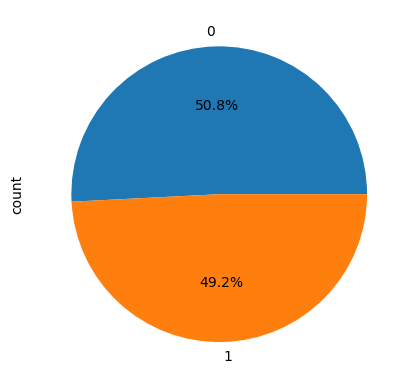

In [21]:
df['cardio'].value_counts().plot.pie(autopct='%1.1f%%')

In [22]:
df.head(8)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,map
0,0,50.0,female,1.68,62.0,110,80,normal,normal,0,0,1,0,21.967120,90.000000
1,1,55.0,male,1.56,85.0,140,90,well_above_normal,normal,0,0,1,1,34.927679,106.666667
2,2,52.0,male,1.65,64.0,130,70,well_above_normal,normal,0,0,0,1,23.507805,90.000000
3,3,48.0,female,1.69,82.0,150,100,normal,normal,0,0,1,1,28.710479,116.666667
4,4,48.0,male,1.56,56.0,100,60,normal,normal,0,0,0,0,23.011177,73.333333
5,8,60.0,male,1.51,67.0,120,80,above_normal,above_normal,0,0,0,0,29.384676,93.333333
6,9,61.0,male,1.57,93.0,130,80,well_above_normal,normal,0,0,1,0,37.729725,96.666667
7,12,62.0,female,1.78,95.0,130,90,well_above_normal,well_above_normal,0,0,1,1,29.983588,103.333333


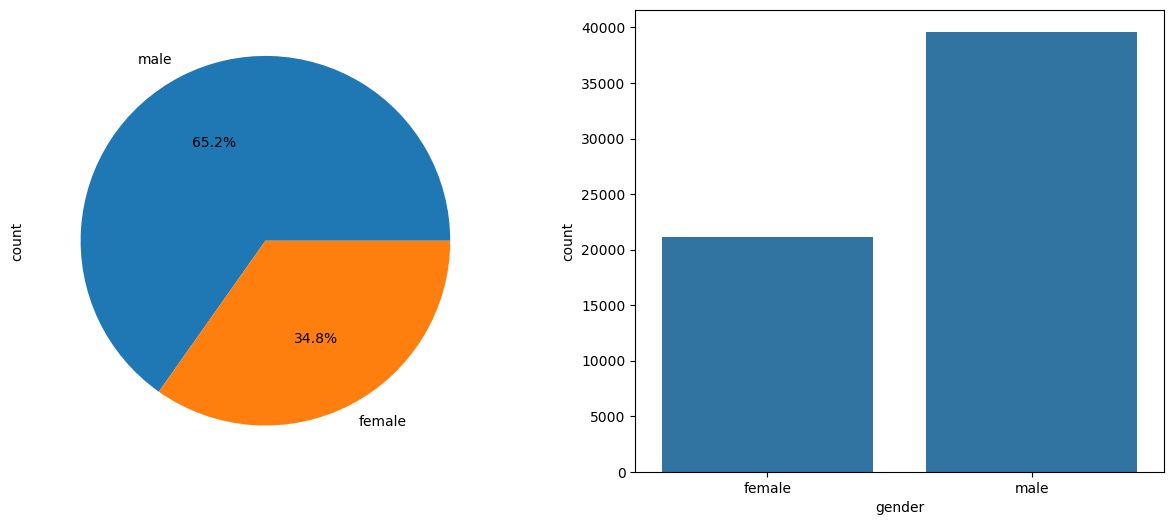

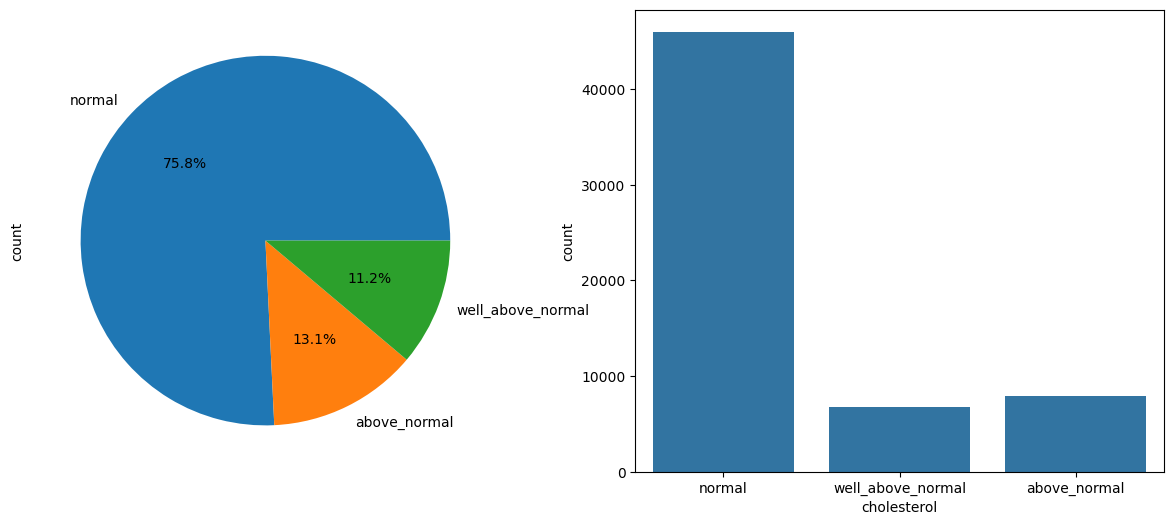

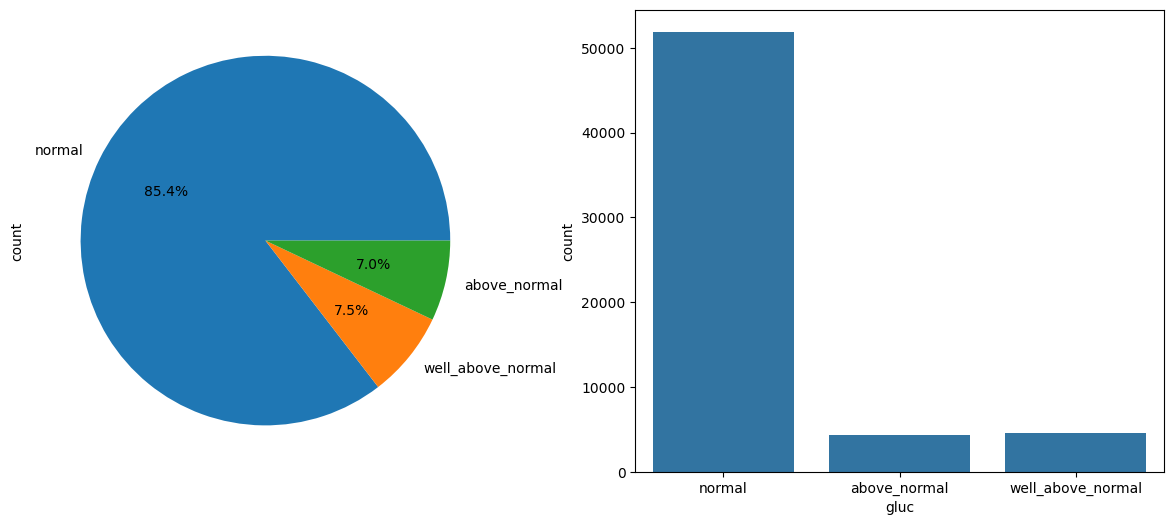

In [23]:
for i in cat_cols:
    f, ax=plt.subplots(1, 2, figsize=(15,6))
    df[i].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
    sns.countplot(data=df, x=i, ax=ax[1])

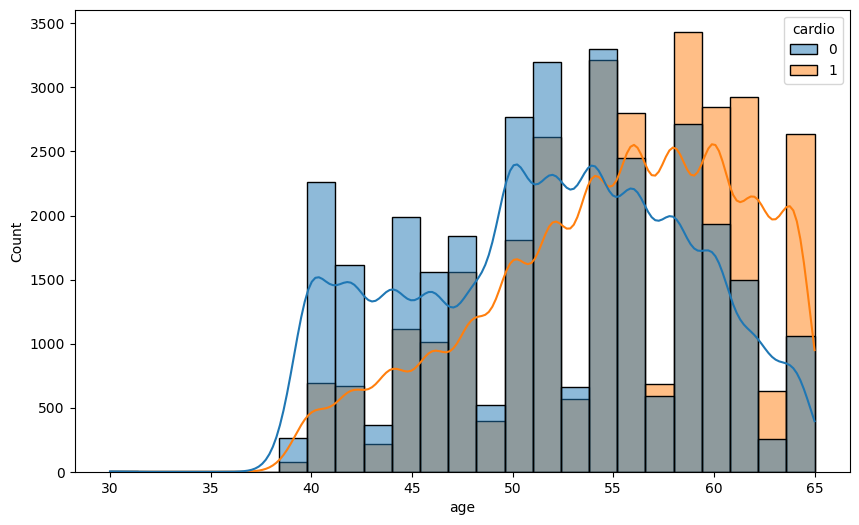

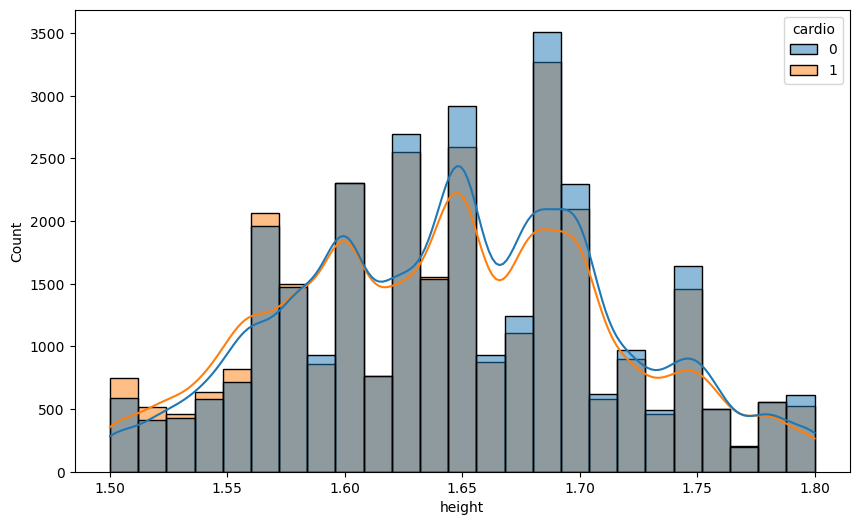

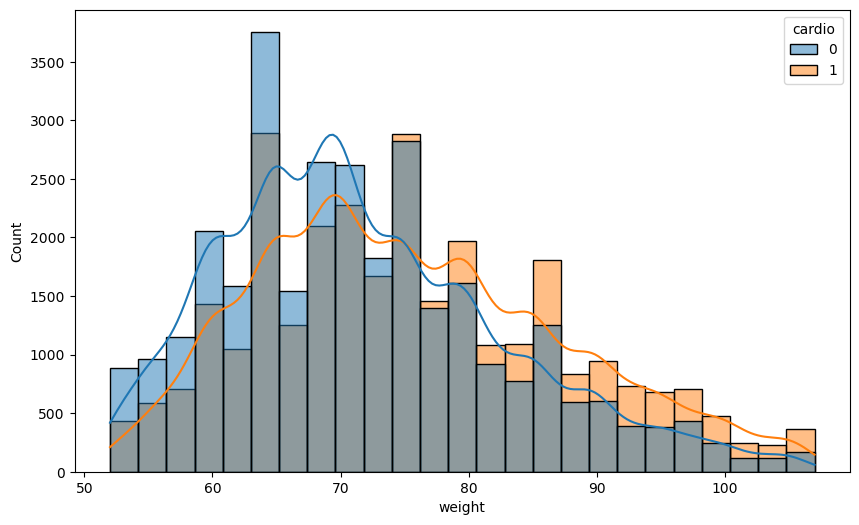

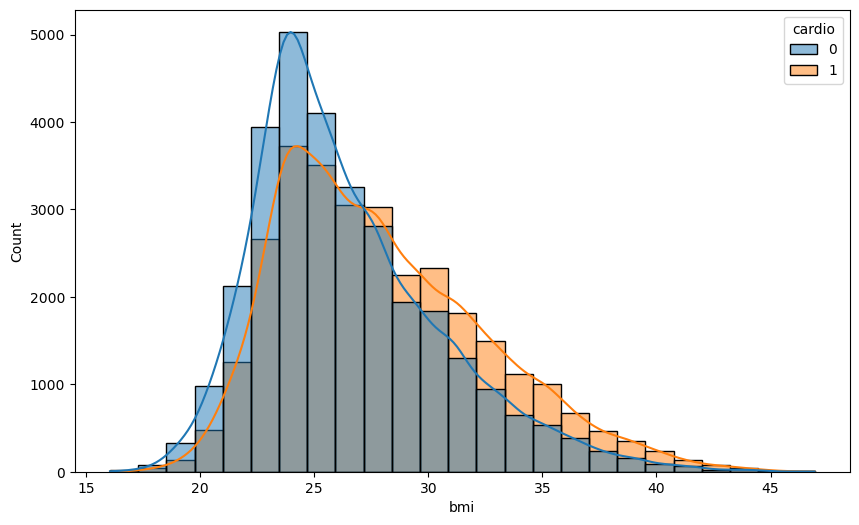

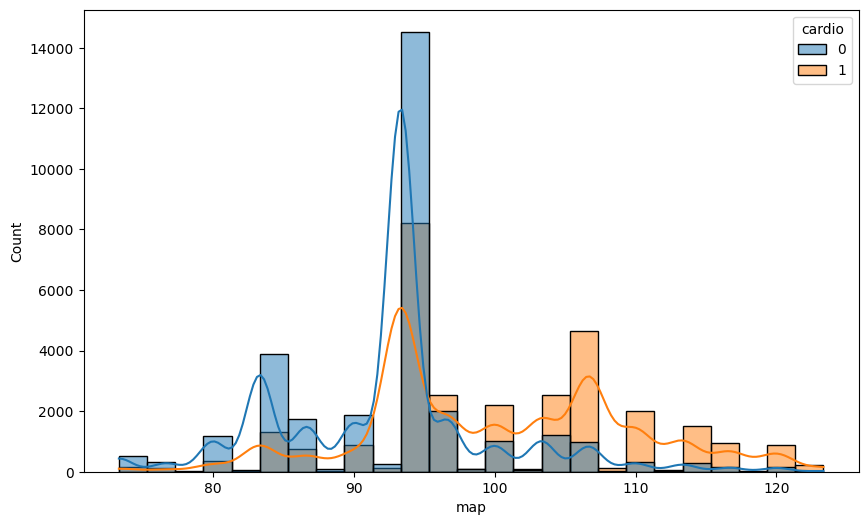

In [24]:
for i in num_cols.drop(['id', 'ap_hi', 'ap_lo', 'smoke','alco','active','cardio']):
    plt.figure(figsize=(10,6))
    sns.histplot(data=df, x=i, hue='cardio', bins=25, kde=True)
    plt.show()

### Correlation Matrix

In [25]:
corr_df = df[["age", "ap_hi","ap_lo", "map","bmi","weight","height","cardio" ]]

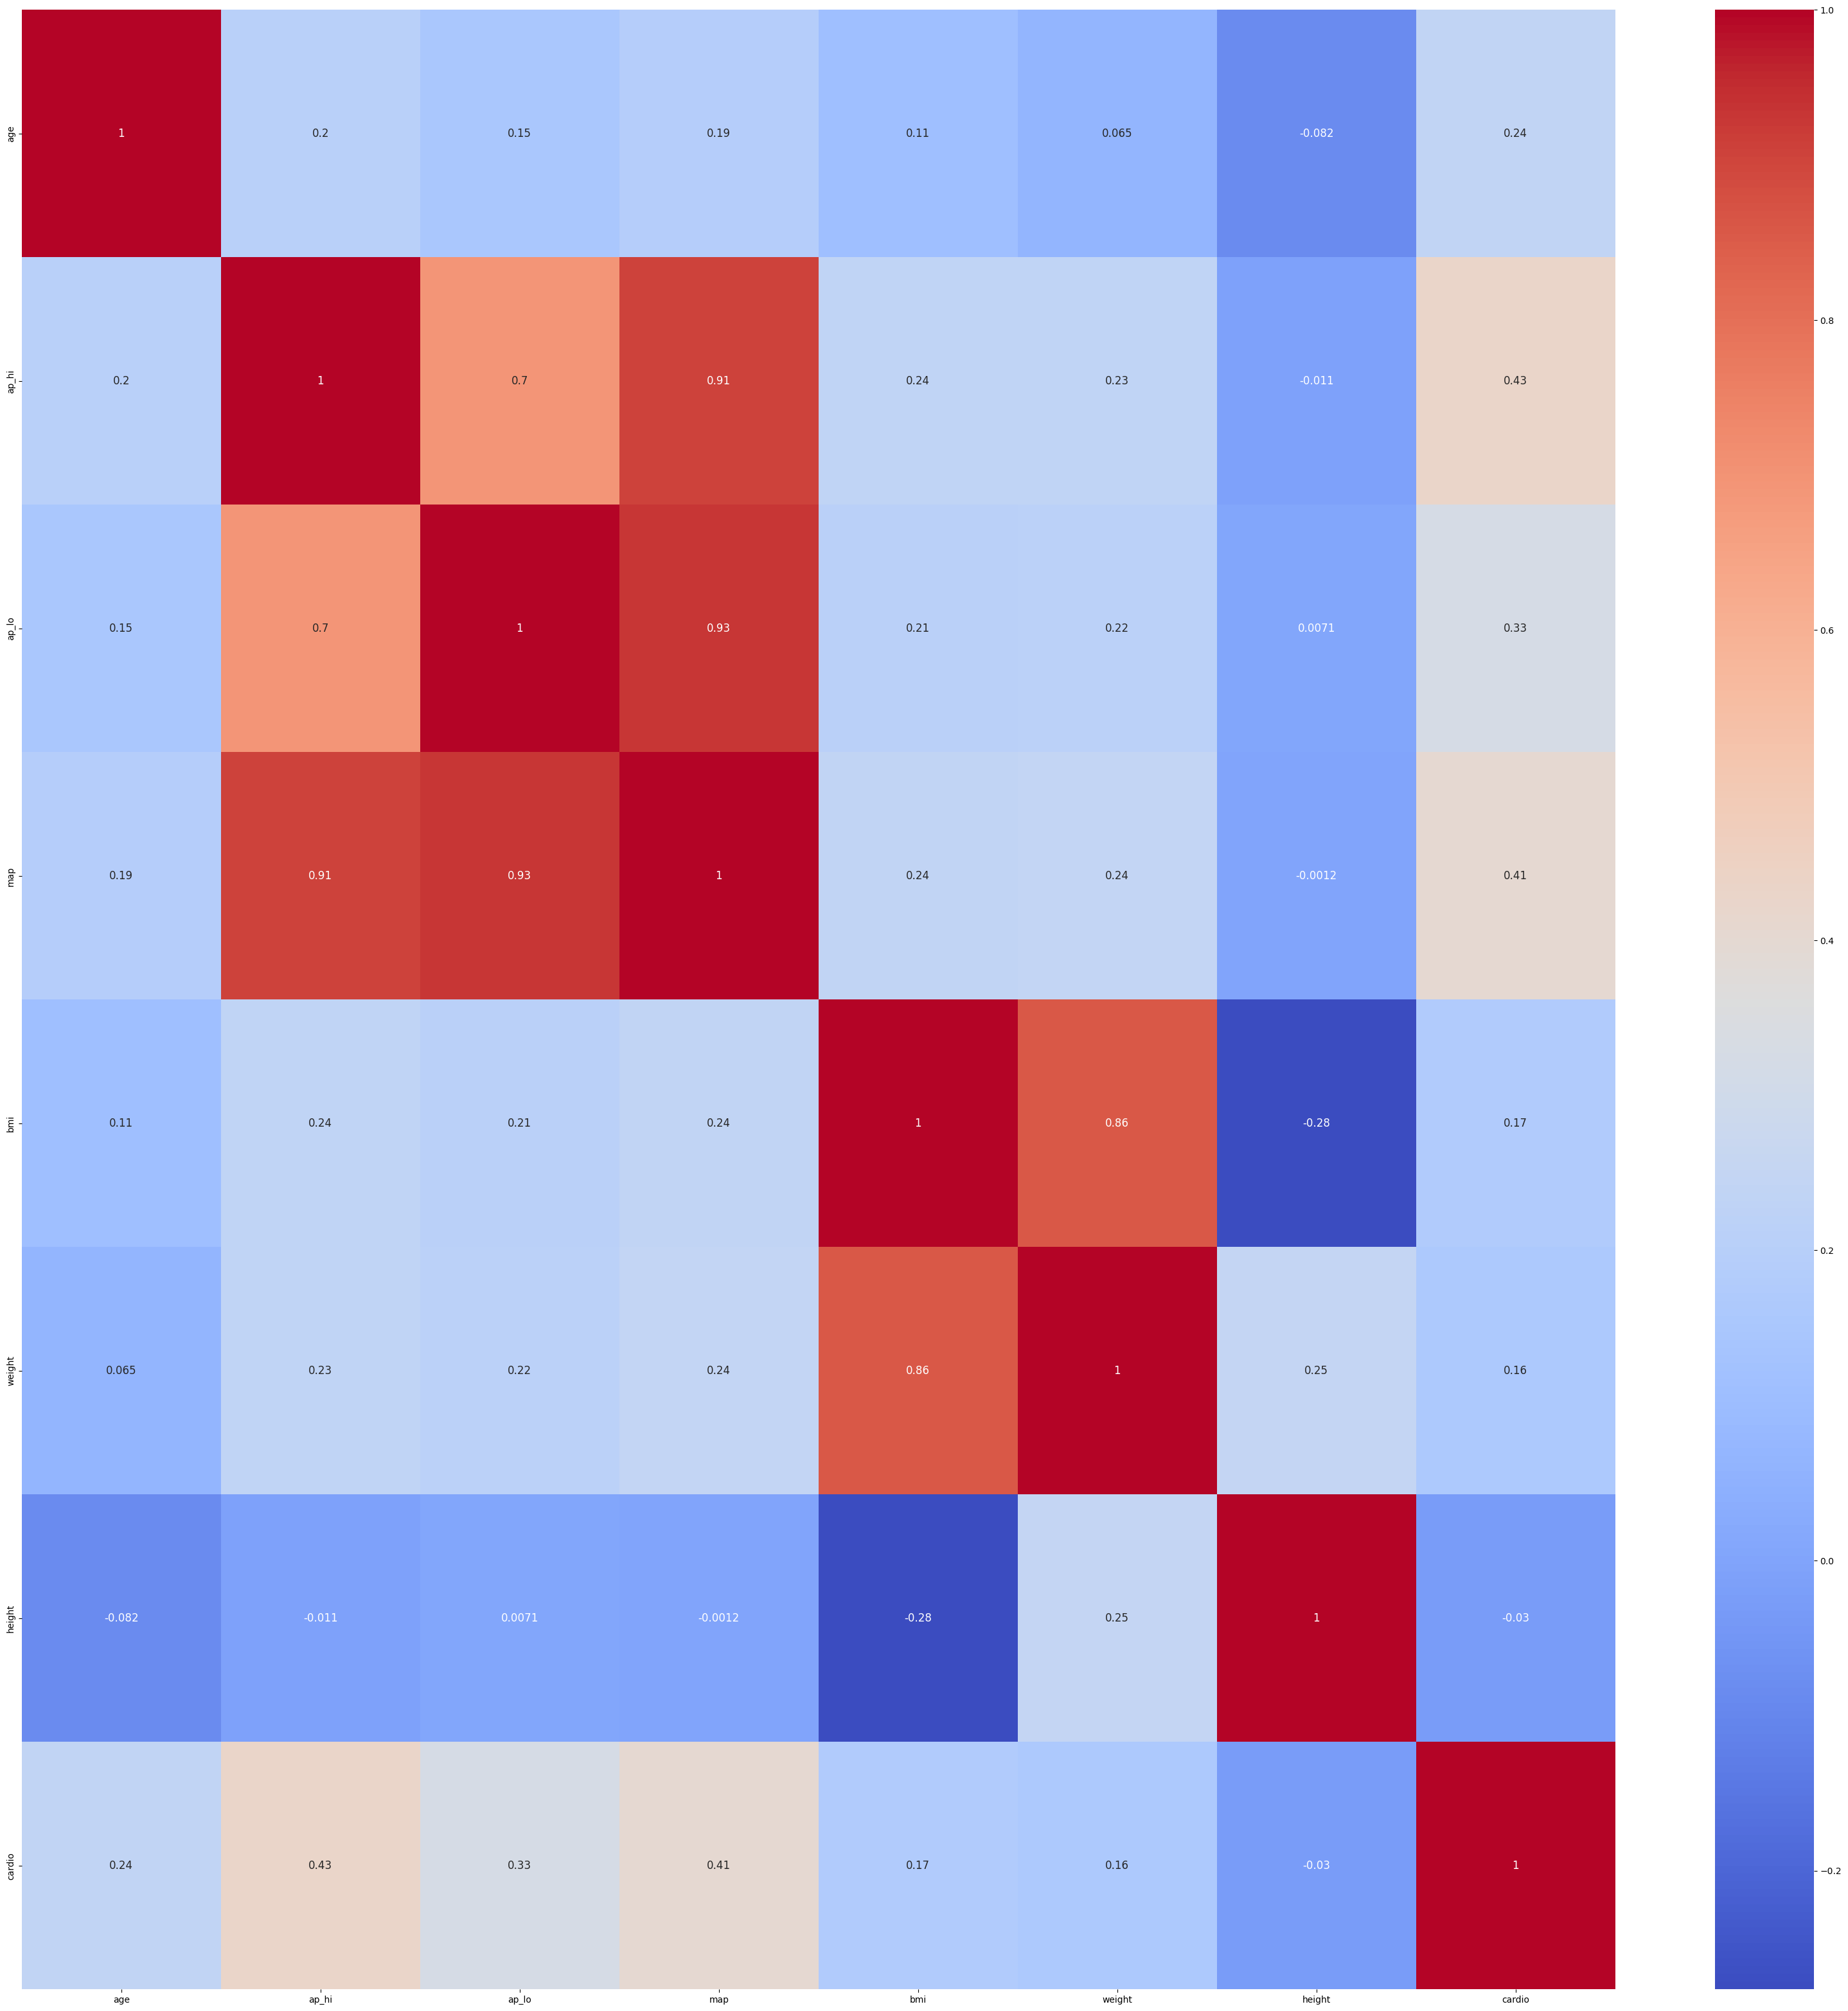

In [26]:
corr_matrix = corr_df.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(40,40))
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm',annot_kws={"size": 12})
plt.show()

In [27]:
corr_matrix['cardio'].sort_values(ascending=False).to_frame().T

,cardio,ap_hi,map,ap_lo,age,bmi,weight,height
cardio,1.0,0.429619,0.405654,0.325637,0.237716,0.173964,0.160254,-0.030479


### Multivariate Analysis

<Figure size 1000x1000 with 0 Axes>

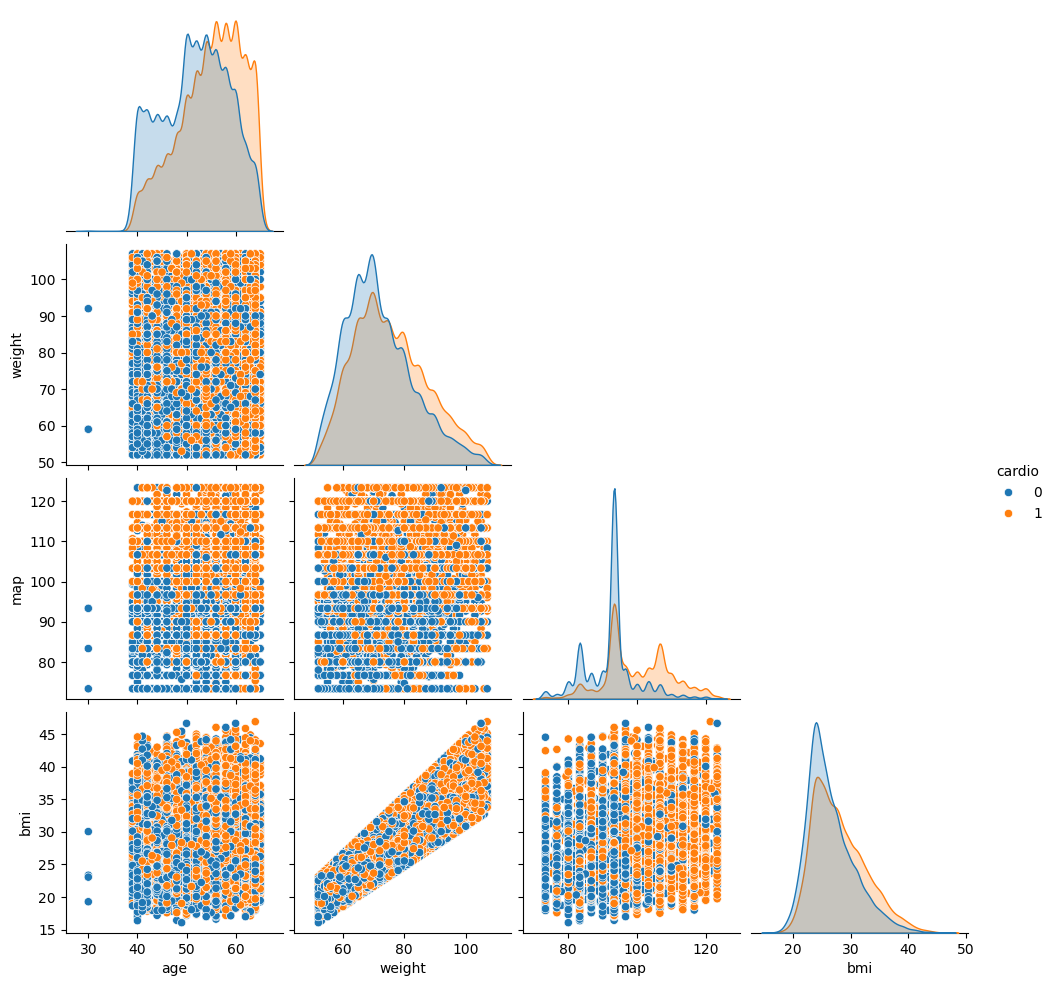

In [28]:
cols=df[['age', 'weight', 'map','bmi', 'cardio']]
plt.figure(figsize=(10,10))
sns.pairplot(cols, hue='cardio', corner=True)
plt.show()

### Statistical Analysis

In [29]:
for i in range(0,70,10): 
    df_updated = df[(df['age'] >= i) & (df['age'] < i+10) & df['cardio'] == 1]
    p = df_updated['age'].count()/df['age'].count()
    print(f"Probability of a patient having cardio disease from age between {i} and {i+10} is {p}")

Probability of a patient having cardio disease from age between 0 and 10 is 0.0
Probability of a patient having cardio disease from age between 10 and 20 is 0.0
Probability of a patient having cardio disease from age between 20 and 30 is 0.0
Probability of a patient having cardio disease from age between 30 and 40 is 0.0012180668949170398
Probability of a patient having cardio disease from age between 40 and 50 is 0.09309981564392941
Probability of a patient having cardio disease from age between 50 and 60 is 0.24886423492230708
Probability of a patient having cardio disease from age between 60 and 70 is 0.14871938372399263


<Figure size 1000x1000 with 0 Axes>

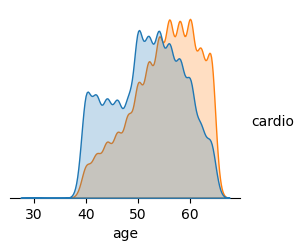

In [30]:
cols=df[['age', 'cardio']]
plt.figure(figsize=(10,10))
sns.pairplot(cols, hue='cardio', corner=True)
plt.show()

Text(0, 0.5, 'Cholesterol')

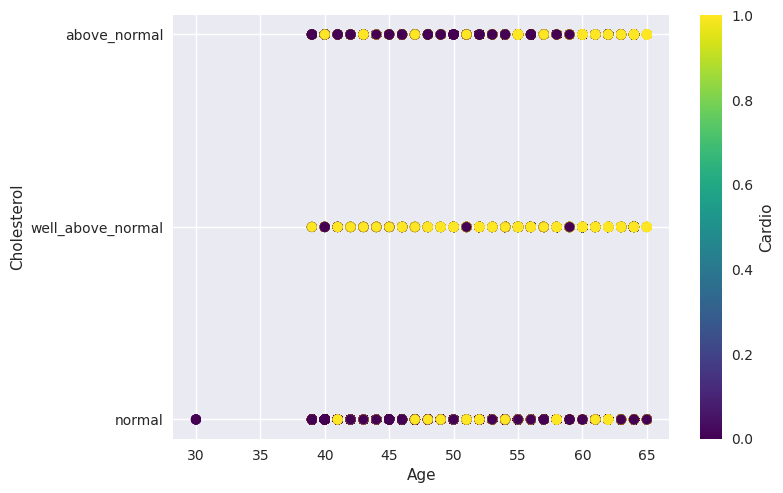

In [31]:
plt.style.use('seaborn')
# X=df['age'].to_numpy()
# Y=df['cholesterol'].to_numpy()
scatter=plt.scatter(df['age'],df['cholesterol'], c=df['cardio'], cmap='viridis')
cbar = plt.colorbar(scatter)
cbar.set_label('Cardio')
plt.xlabel('Age')
plt.ylabel('Cholesterol')


In [32]:
cholesterol_levels = [1, 2, 3]

probabilities_cholesterol = {}

for level in cholesterol_levels:
    subset = data[data['cholesterol'] == level]
    total = len(subset)

    P_cardio_1 = len(subset[subset['cardio'] == 1]) / total
    P_cardio_0 = len(subset[subset['cardio'] == 0]) / total
    
    probabilities_cholesterol[level] = {
        "P(Cardio = 1 | Cholesterol = {})".format(level): P_cardio_1,
        "P(Cardio = 0 | Cholesterol = {})".format(level): P_cardio_0
    }

probabilities_cholesterol


{1: {'P(Cardio = 1 | Cholesterol = 1)': 0.43506126705483616,
  'P(Cardio = 0 | Cholesterol = 1)': 0.5649387329451638},
 2: {'P(Cardio = 1 | Cholesterol = 2)': 0.5929559748427673,
  'P(Cardio = 0 | Cholesterol = 2)': 0.4070440251572327},
 3: {'P(Cardio = 1 | Cholesterol = 3)': 0.7595217006200177,
  'P(Cardio = 0 | Cholesterol = 3)': 0.24047829937998227}}

In [33]:
data['weight_category'] = pd.qcut(data['weight'], q=4, labels=['Low', 'Normal', 'High', 'Very High'])

probabilities_weight = {}

for category in data['weight_category'].unique():
    subset = data[data['weight_category'] == category]
    total = len(subset)
    
    P_cardio_1 = len(subset[subset['cardio'] == 1]) / total
    P_cardio_0 = len(subset[subset['cardio'] == 0]) / total
    
    probabilities_weight[str(category)] = {
        f"P(Cardio = 1 | Weight = {category})": P_cardio_1,
        f"P(Cardio = 0 | Weight = {category})": P_cardio_0
    }

probabilities_weight


{'Low': {'P(Cardio = 1 | Weight = Low)': 0.40554602630074327,
  'P(Cardio = 0 | Weight = Low)': 0.5944539736992567},
 'Very High': {'P(Cardio = 1 | Weight = Very High)': 0.6046220700553068,
  'P(Cardio = 0 | Weight = Very High)': 0.3953779299446932},
 'Normal': {'P(Cardio = 1 | Weight = Normal)': 0.4545828477411394,
  'P(Cardio = 0 | Weight = Normal)': 0.5454171522588607},
 'High': {'P(Cardio = 1 | Weight = High)': 0.517312968043301,
  'P(Cardio = 0 | Weight = High)': 0.48268703195669904}}

In [34]:
probabilities_glucose = {}

glucose_levels = [1,2,3]

for level in glucose_levels:
    subset = data[data['gluc'] == level]
    total = len(subset)
    
    P_cardio_1 = len(subset[subset['cardio'] == 1]) / total
    P_cardio_0 = len(subset[subset['cardio'] == 0]) / total
    
    probabilities_glucose[level] = {
        f"P(Cardio = 1 | Glucose = {level})": P_cardio_1,
        f"P(Cardio = 0 | Glucose = {level})": P_cardio_0
    }

probabilities_glucose


{1: {'P(Cardio = 1 | Glucose = 1)': 0.47412730214995763,
  'P(Cardio = 0 | Glucose = 1)': 0.5258726978500424},
 2: {'P(Cardio = 1 | Glucose = 2)': 0.5780482096887433,
  'P(Cardio = 0 | Glucose = 2)': 0.42195179031125674},
 3: {'P(Cardio = 1 | Glucose = 3)': 0.6132137387880113,
  'P(Cardio = 0 | Glucose = 3)': 0.3867862612119886}}

In [35]:
age_gender_1 = data[data['gender'] == 1]['age'] 
age_gender_2 = data[data['gender'] == 2]['age'] 
print((age_gender_1).mean())
(age_gender_2).mean()

53.48113183734255


53.137118523775726

In [45]:
from scipy import stats
age_gender_1 = data[data['gender'] == 1]['age'] 
age_gender_2 = data[data['gender'] == 2]['age'] 


mean_1, std_1, n_1 = age_gender_1.mean(), age_gender_1.std(), len(age_gender_1)
mean_2, std_2, n_2 = age_gender_2.mean(), age_gender_2.std(), len(age_gender_2)


from statsmodels.stats.weightstats import ztest

t_stat, p_value = stats.ttest_ind(age_gender_1, age_gender_2, alternative='two-sided')

t_stat, p_value


(5.9891704996276625, 2.1209513895467666e-09)

In [46]:
smokers_map = data[data['smoke'] == 1]['map']  
non_smokers_map = data[data['smoke'] == 0]['map']

t_stat, p_value = stats.ttest_ind(smokers_map, non_smokers_map, alternative='two-sided')

t_stat, p_value

(5.234129851879041, 1.6631348042577547e-07)

In [47]:
print(smokers_map.std())
non_smokers_map.std()

9.669932018869398


9.474302091024

In [48]:
smokers_cholesterol = data[data['smoke'] == 1]['cholesterol']  # smokers
non_smokers_cholesterol = data[data['smoke'] == 0]['cholesterol']  # non-smokers


t_stat, p_value = stats.ttest_ind(smokers_cholesterol, non_smokers_cholesterol)

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: 1.1228558833160316
p-value: 0.26150314426617544


In [49]:
from scipy.stats import chi2_contingency


contingency_table_smoke_cardio = pd.crosstab(data['smoke'], data['cardio'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table_smoke_cardio)

chi_squared_results = {
    "Chi-Squared Statistic": chi2_stat,
    "p-value": p_value,
    "Degrees of Freedom": dof,
    "Expected Frequencies": expected,
}

chi_squared_results


{'Chi-Squared Statistic': 32.057765312624426,
 'p-value': 1.4965569557611743e-08,
 'Degrees of Freedom': 1,
 'Expected Frequencies': array([[28221.82301817, 27322.17698183],
        [ 2646.17698183,  2561.82301817]])}

In [50]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,map,weight_category
0,0,50.0,2,1.68,62.0,110,80,1,1,0,0,1,0,21.967120,90.000000,Low
1,1,55.0,1,1.56,85.0,140,90,3,1,0,0,1,1,34.927679,106.666667,Very High
2,2,52.0,1,1.65,64.0,130,70,3,1,0,0,0,1,23.507805,90.000000,Low
3,3,48.0,2,1.69,82.0,150,100,1,1,0,0,1,1,28.710479,116.666667,Very High
4,4,48.0,1,1.56,56.0,100,60,1,1,0,0,0,0,23.011177,73.333333,Low


In [51]:
nor_c0 = df[(df["cholesterol"] == "normal") & (data["cardio"] == 0)].shape[0]
nor_c1 = df[(df["cholesterol"] == "normal") & (df["cardio"] == 1)].shape[0]
abv_c0 = df[(df["cholesterol"] == "above_normal") & (df["cardio"] == 0)].shape[0]
abv_c1 = df[(df["cholesterol"] == "above_normal") & (df["cardio"] == 1)].shape[0]
well_c0 = df[(df["cholesterol"] == "well_above_normal") & (df["cardio"] == 0)].shape[0]
well_c1 = df[(df["cholesterol"] == "well_above_normal") & (df["cardio"] == 1)].shape[0]
print(f"{nor_c0},{nor_c1},{abv_c0},{abv_c1},{well_c0},{well_c1}")

26003,20025,3236,4714,1629,5145


In [52]:
dict = {
    0 : [nor_c0,abv_c0,well_c0,(nor_c0+abv_c0+well_c0)],
    1 : [nor_c1,abv_c1,well_c1,(nor_c1+abv_c1+well_c1)],
    "total": [(nor_c0+nor_c1),(abv_c0+abv_c1),(well_c0+well_c1),(nor_c0+abv_c0+well_c0+nor_c1+abv_c1+well_c1)]
}
chi = pd.DataFrame(dict)
chi

,0,1,total
0,26003,20025,46028
1,3236,4714,7950
2,1629,5145,6774
3,30868,29884,60752


In [53]:
chi["index"] = [0,1,2,3]
chi

,0,1,total,index
0,26003,20025,46028,0
1,3236,4714,7950,1
2,1629,5145,6774,2
3,30868,29884,60752,3


In [54]:
arr = chi.to_numpy()
arr       

array([[26003, 20025, 46028,     0],
       [ 3236,  4714,  7950,     1],
       [ 1629,  5145,  6774,     2],
       [30868, 29884, 60752,     3]], dtype=int64)

In [55]:
a = np.empty((4, 3))
sum=0
for i in range(3):
    for j in range(2):
        a[i,j] = arr[i,2]*arr[3,j]/arr[3,2]
        sum  = sum + a[i,j]
        print(a[i,j])
print(sum)

23386.757703450094
22641.242296549906
4039.383065578088
3910.616934421912
3441.8592309718197
3332.1407690281803
60752.0


In [56]:
s=0
for i in range(3):
    for j in range(2):
        temp = ((arr[i,j] - a[i,j])**2 / a[i,j])
        s = s + temp
        #print(temp)
print(s)

2860.9546564812595


In [57]:
contingency_table_cholesterol = pd.crosstab(data['cholesterol'], data['cardio'])

chi2_stat_cholesterol, p_value_cholesterol, dof_cholesterol, expected_cholesterol = chi2_contingency(contingency_table_cholesterol)

cholesterol_hypothesis_results = {
    "Chi-Squared Statistic": chi2_stat_cholesterol,
    "p-value": p_value_cholesterol,
    "Degrees of Freedom": dof_cholesterol,
    "Expected Frequencies": expected_cholesterol,
}

cholesterol_hypothesis_results


{'Chi-Squared Statistic': 2860.9546564812595,
 'p-value': 0.0,
 'Degrees of Freedom': 2,
 'Expected Frequencies': array([[23386.75770345, 22641.24229655],
        [ 4039.38306558,  3910.61693442],
        [ 3441.85923097,  3332.14076903]])}

In [59]:
data['gluc'].unique()

array([1, 2, 3], dtype=int64)

### Model training and Validation

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,r2_score

features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
            'cholesterol', 'gluc', 'smoke', 'alco','bmi','map']
target = 'cardio'

X = data[features]
y = data[target]

X = X.apply(pd.to_numeric, errors='coerce')

X = X.dropna()
y = y.loc[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Random Forest Model

Classification Report of Random Forest:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      9279
           1       0.70      0.68      0.69      8947

    accuracy                           0.70     18226
   macro avg       0.70      0.70      0.70     18226
weighted avg       0.70      0.70      0.70     18226

Accuracy: 0.6977394930319324
ROC-AUC Score: 0.753


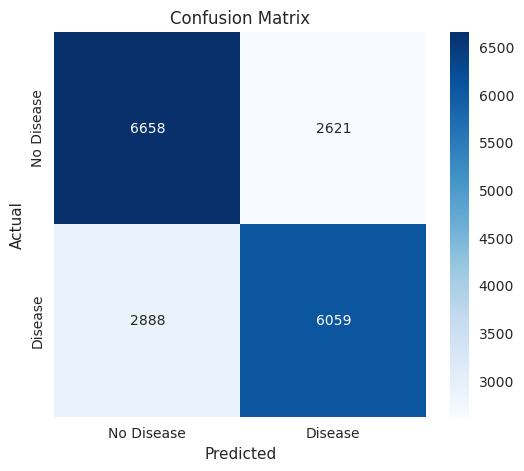

In [61]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, output_dict=True)
roc_auc = roc_auc_score(y_test, y_pred_prob)

#Classification Report
print("Classification Report of Random Forest:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy}")
print(f"ROC-AUC Score: {roc_auc:.3f}")


conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Logistic Regression

Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      9279
           1       0.75      0.65      0.70      8947

    accuracy                           0.72     18226
   macro avg       0.73      0.72      0.72     18226
weighted avg       0.73      0.72      0.72     18226

Accuracy: 0.7228135630418084
ROC-AUC Score: 0.721


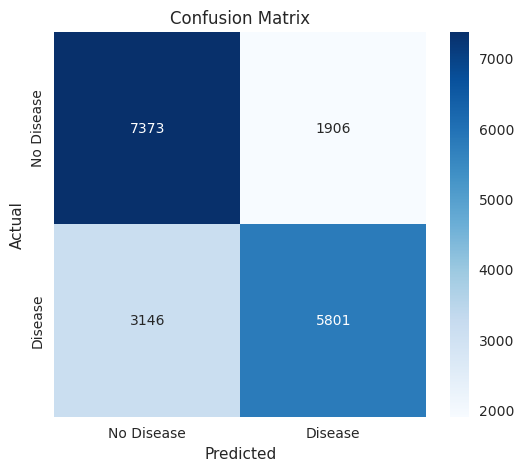

In [62]:
model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


print(f"Classification Report of Logistic Regression:\n{class_report}")
print(f"Accuracy: {accuracy}")
print(f"ROC-AUC Score: {roc_auc:.3f}")

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Naive Bayes Classifier


Classification Report of Naive Bayes:
               precision    recall  f1-score   support

           0       0.69      0.81      0.75      9279
           1       0.76      0.62      0.68      8947

    accuracy                           0.72     18226
   macro avg       0.72      0.71      0.71     18226
weighted avg       0.72      0.72      0.71     18226


ROC-AUC Score: 0.7744459707176459
Accuracy: 0.7167782289037639


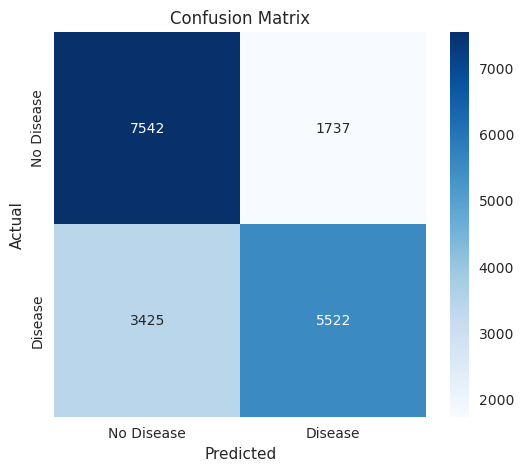

In [63]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)
y_pred_prob = nb_model.predict_proba(X_test)[:, 1]  

print("\nClassification Report of Naive Bayes:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))
print("Accuracy:", accuracy_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
